# ============================

# Week 3

# ============================

# -----------------------------------------

## Object Oriented Programming in Python

# -----------------------------------------

## Python Class

### 1. Objects and Methods

let's define a class "dog", and the operations that a dog is able to to, like barking. We call these operations "methods" (functions inside a class):<br>

# -----------------------------------------

## Introduction to Statistics

# -----------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 25,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# Set the font parameters
plt.rc('font', **font) 

First, we are going to define a gaussian function. We can use built-in functions in numpy for getting a gaussian function. However, let's define it ourself  as a practice:


In [2]:
def Gaussian_prob_dist(x, _mu = 0, _sigma = 1):
    """ Gaussian Distribution: The probability of getting x given _mu, _sigma """
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - _mu)**2 / (2 * _sigma**2))

In [3]:
# Initialize

x_span = np.linspace(0, 20, 1000)
mu, sigma = 10, 5

prob_list = [Gaussian_prob_dist(x, mu, sigma) for x in x_span]

Another equivalent way of doing the above but using the numpy arrays. (Be very careful when writing code this way, since the code above works for any iterable object; but, the method used below can only be applied for the numpy array object and not a list.

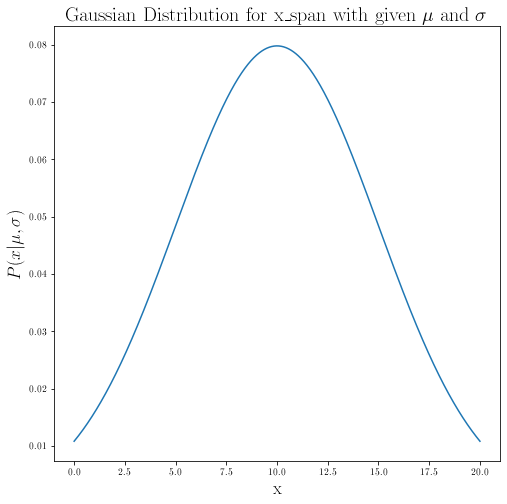

In [7]:
plt.figure(figsize = (8, 8))
plt.plot(x_span, prob_list)

plt.title("Gaussian Distribution for x_span with given $\mu$ and $\sigma$", fontsize = 20)
plt.xlabel(r"x", fontsize = 18)
plt.ylabel(r"$P(x| \mu, \sigma)$", fontsize = 18)

plt.show()

### A new particle is discovered in CERN!

$$
\begin{gather}
M_{ATLAS} = 10.12 \pm 3.7 \\
M_{CMS} = 7.42 \pm 1.6
\end{gather}
$$

#### Q: What should be reported to the public as the new particle's mass?

In [8]:
mass_atlas, mass_err_atlas = 10.12, 3.7
mass_cms, mass_err_cms = 7.42, 1.6

In [10]:
report_1 = (mass_atlas + mass_cms) / 2
report_1

8.77

$ X_1 $: mass_atlas, mass_err_atlas  
$ X_2 $: mass_cms, mass_err_cms  

### Bayes Theorem

Bayes Theorem: $p(m_{x}| X_{1}, X_{2}) \varpropto p(X_{1}, X_{2}|m_{x})$

More precisely:

$P(X|Y) = \frac{P(Y | X) P(X)}{P(Y)}$

### Assumptions

1- The measurements are independent <br>
$P(X_{1}, X_{2} | m_{x}) = P(X_{1} | m_{x}) * p(X_{2} | m_{x})$

2- Measurements follow a Normal Distribution
$PDF(m_{\text{measured}}) = Gaussian(m_{\text{measured}}, \sigma_{\text{measured}})$

3- no info about $m_{x}$: the simplest choice: uniform PDF (Top Hat)

let's calculate $p(X_{1} | m_{x})$:

We start by sampling potential values for $m_{X}$:

In [11]:
m_X_span = np.arange(0, 25, 0.001)

Making two arrays of zeros for storing the probabilities

In [12]:
prob_atlas = np.zeros(len(m_X_span))
prob_cms = np.zeros(len(m_X_span))

Building the joint pdf [p(X1, X2)]

In [13]:
for i, m in enumerate(m_X_span):
    prob_atlas[i] = Gaussian_prob_dist(mass_atlas, _mu = m, _sigma = mass_err_atlas)
    prob_cms[i] = Gaussian_prob_dist(mass_cms, _mu = m, _sigma = mass_err_cms)

Find the joint probability

In [16]:
joint_prob = prob_atlas * prob_cms
joint_prob

array([3.23111642e-09, 3.24289078e-09, 3.25470654e-09, ...,
       1.22205269e-32, 1.21237231e-32, 1.20276805e-32])

In [17]:
Normalization = len(m_X_span) / (sum(joint_prob) * (max(m_X_span) - min(m_X_span)))
joint_prob_normalized = joint_prob * Normalization

Finding the mass corresponding to the highest probability:

In [32]:
m_X_max_prob = m_X_span[joint_prob == max(joint_prob)]
print("The value with the maximum probability is: ", m_X_max_prob[0])

The value with the maximum probability is:  7.845


plotting the pdf for the two measurements + joint pdf (normalized and unnormalized):

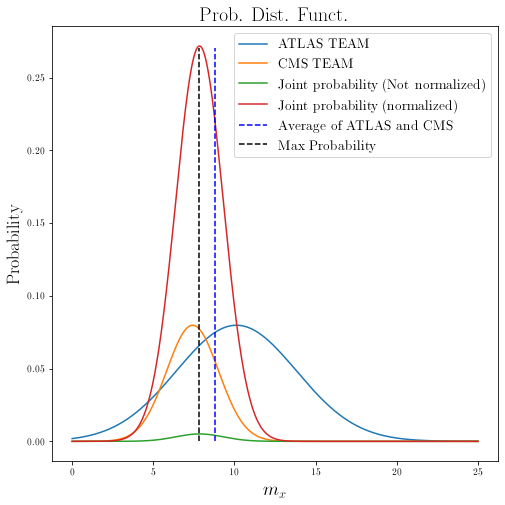

In [29]:
plt.figure(figsize = (8, 8))

plt.plot(m_X_span, prob_atlas, label = "ATLAS TEAM")
plt.plot(m_X_span, prob_cms, label = "CMS TEAM")

plt.plot(m_X_span, joint_prob, label = "Joint probability (Not normalized)")
plt.plot(m_X_span, joint_prob_normalized, label = "Joint probability (normalized)")

plt.vlines(report_1, 0, 0.27, color = 'blue', linestyles="dashed", label="Average of ATLAS and CMS")
plt.vlines(m_X_max_prob, 0, 0.27, color = 'black', linestyles="dashed", label="Max Probability")

plt.title(r"Prob. Dist. Funct.", fontsize = 20)
plt.xlabel(r"$m_{x}$", fontsize = 19)
plt.ylabel(r"Probability", fontsize = 18)

plt.legend(fontsize = 14)

plt.show()

The analytical way of finding this result is simple as we are working with Gaussian Functions:

The probability of two Gaussians (independent) is a Gaussian PDF

$Gaussian(\mu = \frac{\mu_{1} \sigma_{2}^{2} + \mu_{2}\sigma_{1}^{2}}{\sigma_{1}^{2}+\sigma_{2}^{2}}, \sigma = \frac{\sigma_{1}\sigma_{2}}{\sqrt{\sigma_{1}^{2} +\sigma_{2}^{2}}}) = Gaussian (\mu_{1}, \sigma_{1}) \times Gaussian (\mu_{2}, \sigma_{2})$